# cargar los datos de manera local


In [ ]:
'''
com esta parte del código podemos subir nuestros archivos desde nuestro ordenador local, y luego podemos
 plotar la imagen escogida y el pronostico de la foto segun nuestro código ya trabajado
 '''

In [27]:
from google.colab import files
uploaded = files.upload()


Saving meee.jpg to meee.jpg


In [31]:
import os

# Listar los archivos subidos
for file_name in uploaded.keys():
    print(f'User uploaded file "{file_name}" with length {len(uploaded[file_name])} bytes')


User uploaded file "meee.jpg" with length 185769 bytes


In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_image(image_path):
    # Cargar y preprocesar la imagen
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Hacer la predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Verificar si la clase está en el conjunto de clases conocidas
    if predicted_class in train_generator.class_indices.values():
        return list(train_generator.class_indices.keys())[predicted_class]
    else:
        return "Perro no encontrado"




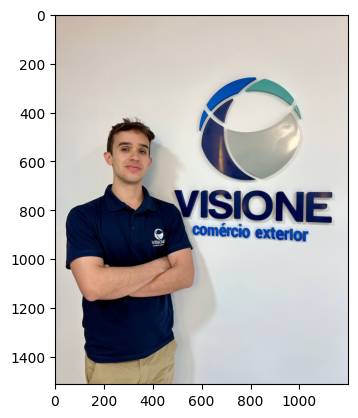

In [33]:
# Verificar la imagen
image_path = 'meee.jpg'  # Cambia esto por el nombre de la imagen que subiste
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()



In [34]:
# Hacer la predicción
predicted_label = predict_image(image_path)
print(f'Predicted label: {predicted_label}')

1/1 [==============================] - 0s 36ms/step
Predicted label: dajean


# codigo completo


em el siguiente código trabajamos uma red neuronal para clasificacion de imagenes, usamos de ejemplo 3 personas, Abiel, mi mama y yo, tomando los datos desde google drive( es importante conectarse a um google drive para tomar las fotos deseadadas) y al final lo configuramos como uma funcion para poder tener um imput y que el out put sea la fono nueva y el pronostico

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir = '/content/drive/My Drive/1-0GvO4Z-yykucpQkseyOs9oxE-_GU8hB?usp=drive_link'

In [4]:
!ls /content/drive/My\ Drive/


 BaseDeDatosLista.xlsx	'nueva foto'					     yooo
'Colab Notebooks'	'proyectos a desarrollar de clasificacion ML.docx'
'Human-Aid. Modelo ML'	 todo


In [5]:
# Verificar el contenido de la raíz de Google Drive
root_path = '/content/drive/My Drive/'
print(os.listdir(root_path))

['Colab Notebooks', 'BaseDeDatosLista.xlsx', 'Human-Aid. Modelo ML', 'proyectos a desarrollar de clasificacion ML.docx', 'todo', 'nueva foto', 'yooo']


In [6]:

# Ajustar la ruta según tu estructura de carpetas
data_dir = os.path.join(root_path, 'todo')

In [7]:
# Listar el contenido de la carpeta específica
print(os.listdir(data_dir))

['geral', 'abiel', 'dajean']


In [8]:
!pip install tensorflow


In [ ]:
#En vez de cargar nuestros datos desde google drive, los podemos cargar en un archivo comprimido desde nuetro ordenador local,
#haciendo uma carpeta em general com las diferentes subcarpetas dependiendo de cuantos objetos o cosas queremos diferenciar
'''
from google.colab import files
import zipfile
import os

# Subir el archivo ZIP
uploaded = files.upload()

# Extraer el archivo ZIP
for file_name in uploaded.keys():
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall('/content/images')

# Verificar las imágenes extraídas
data_dir = '/content/images'
print(os.listdir(data_dir))
'''

Found 28 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


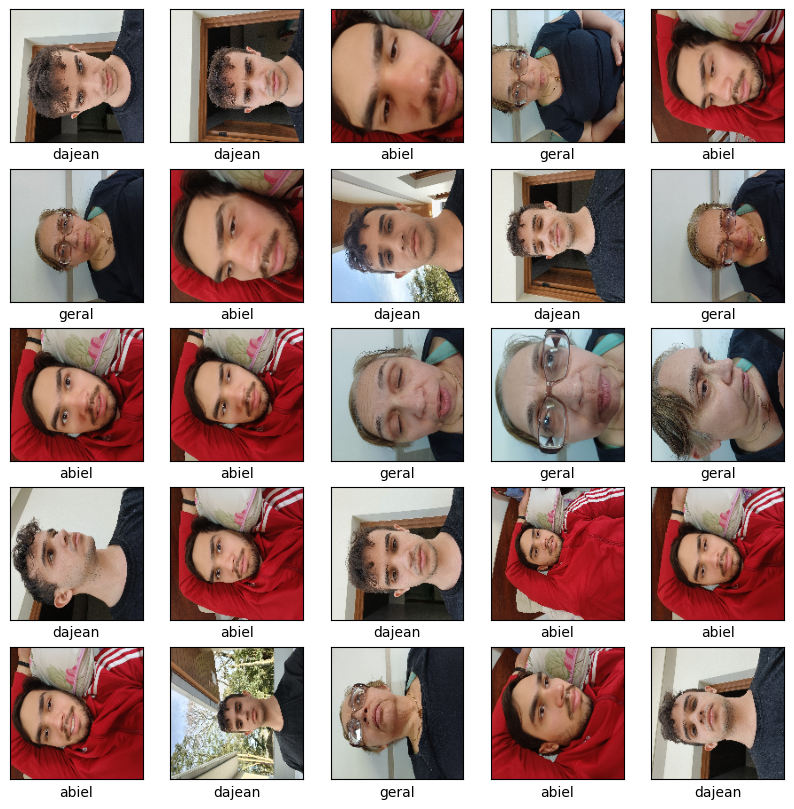

In [9]:
# Crear un generador de datos para cargar las imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% de los datos para validación
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Mostrar algunas imágenes del dataset
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.show()

images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())
plot_images(images[:25], [np.argmax(labels[i]) for i in range(25)], class_names)


In [10]:
from tensorflow.keras import layers, models

# Crear el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
1/1 [==============================] - 22s 22s/step - loss: 1.1059 - accuracy: 0.2857 - val_loss: 0.9579 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 7s 7s/step - loss: 1.0480 - accuracy: 0.4286 - val_loss: 1.0543 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 1.0254 - accuracy: 0.2857 - val_loss: 0.7816 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.8826 - accuracy: 0.4286 - val_loss: 0.5916 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.6733 - accuracy: 0.8214 - val_loss: 0.4144 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.4938 - accuracy: 0.6786 - val_loss: 0.1816 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 0.2900 - accuracy: 0.9643 - val_loss: 0.0971 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======================

In [11]:
# Evaluar el modelo
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc}')


1/1 [==============================] - 1s 689ms/step - loss: 0.0103 - accuracy: 1.0000
Validation accuracy: 1.0


1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

       abiel       0.50      0.50      0.50         2
      dajean       1.00      1.00      1.00         1
       geral       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



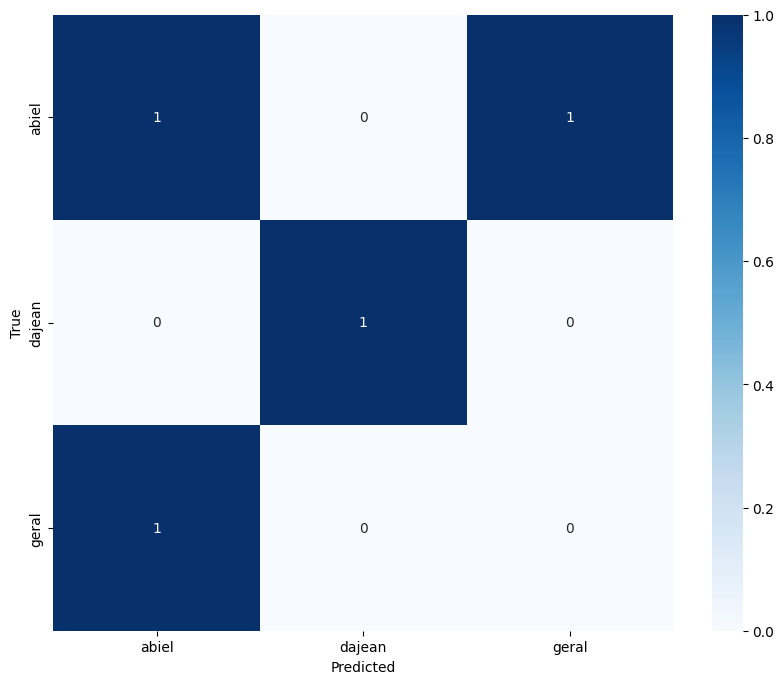

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de validación
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Reporte de clasificación
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


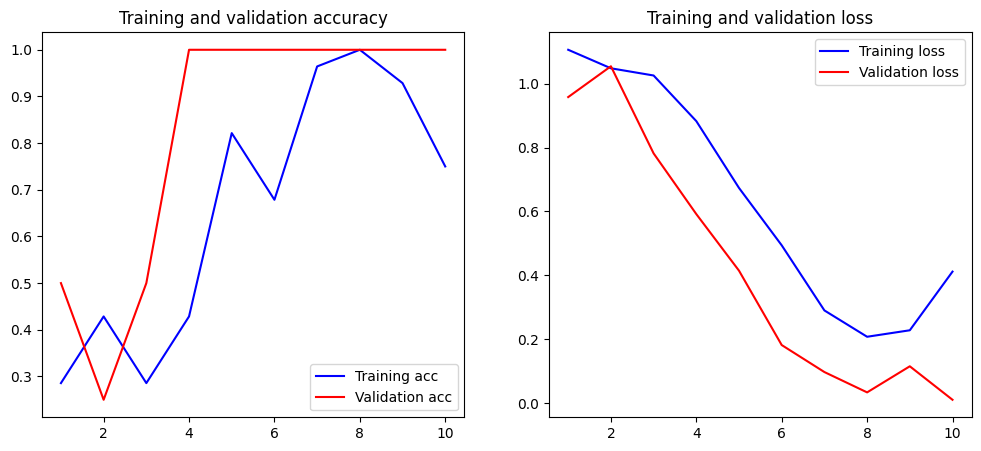

In [13]:
# Graficar precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [14]:
from tensorflow.keras import layers, models

# Crear el modelo CNN con Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 1.0917 - accuracy: 0.3929 - val_loss: 0.9609 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 10s 10s/step - loss: 1.0682 - accuracy: 0.4286 - val_loss: 1.1073 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 7s 7s/step - loss: 1.0679 - accuracy: 0.2857 - val_loss: 0.9945 - val_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.9762 - accuracy: 0.7857 - val_loss: 0.7925 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.8427 - accuracy: 0.8214 - val_loss: 0.5685 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 0.6686 - accuracy: 0.7857 - val_loss: 0.3916 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.4224 - accuracy: 1.0000 - val_loss: 0.1999 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=====================

In [15]:
# Evaluar el modelo
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_acc}')


1/1 [==============================] - 0s 465ms/step - loss: 0.0127 - accuracy: 1.0000
Validation accuracy: 1.0


In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!ls /content/drive/My\ Drive/


 BaseDeDatosLista.xlsx	'nueva foto'					     yooo
'Colab Notebooks'	'proyectos a desarrollar de clasificacion ML.docx'
'Human-Aid. Modelo ML'	 todo


In [18]:
!ls /content/drive/My\ Drive/yooo/


yo.png


In [19]:
image_path = '/content/drive/My Drive/yooo/yo.png'


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.image as mpimg

def predict_image(image_path):
    # Cargar y preprocesar la imagen
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Hacer la predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Verificar si la clase está en el conjunto de clases conocidas
    if predicted_class in train_generator.class_indices.values():
        return list(train_generator.class_indices.keys())[predicted_class]
    else:
        return "Perro no encontrado"




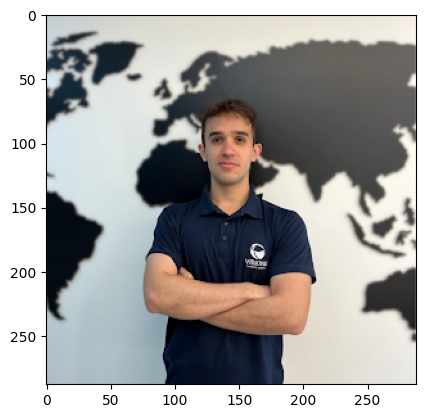

In [25]:
# Verificar la imagen
image_path = '/content/drive/My Drive/yooo/yo.png'  # Asegúrate de que esta es la ruta correcta
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

In [23]:
# Hacer la predicción
predicted_label = predict_image(image_path)
print(f'Predicted label: {predicted_label}')

1/1 [==============================] - 0s 216ms/step
Predicted label: dajean


In [ ]:
#Esta funcion la podemos usar para obtener de output un archivo com el pronostico de cada imagen segun nuestro
# modelo, el output deberia ser com cada clasificacion ya separada segun lo entrenado anteriormente
'''
import shutil

def predict_and_save_images(image_dir, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)

        # Predecir la clase de la imagen
        predicted_label = predict_image(image_path)

        # Crear una carpeta para la clase predicha si no existe
        class_dir = os.path.join(save_dir, predicted_label)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

        # Mover la imagen a la carpeta de la clase predicha
        shutil.move(image_path, os.path.join(class_dir, image_name))

    print(f'Imágenes guardadas en {save_dir} según sus clases predichas.')

# Definir el directorio de salida para las imágenes clasificadas
classified_images_dir = '/content/classified_images'

# Predecir y guardar las imágenes en carpetas separadas
predict_and_save_images('/content/images', classified_images_dir)
'''

In [ ]:
#y con esta descargamos nuestro output a nuestro computador local
'''
import shutil
from google.colab import files

def compress_and_download(directory, output_filename):
    # Comprimir el directorio en un archivo ZIP
    shutil.make_archive(output_filename, 'zip', directory)

    # Descargar el archivo ZIP
    files.download(output_filename + '.zip')

# Directorio de salida de las imágenes clasificadas
classified_images_dir = '/content/classified_images'

# Nombre del archivo ZIP de salida
output_filename = 'classified_images'

# Comprimir y descargar el archivo ZIP
compress_and_download(classified_images_dir, output_filename)
'''